In [ ]:
import subprocess

subprocess.run(["python", "my_app.py"])

In [ ]:
#pip install --ignore-installed shiny

: 

In [1]:
from shiny import App, render, ui
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [ ]:
#pip install rpy2

In [2]:
from rpy2 import robjects

# `faithful$eruptions` from R
eruptions = robjects.r['faithful'][0]

#eruptions = np.random.normal(loc=3.5, scale=1.0, size=272)

In [3]:
app_ui = ui.page_fluid(
    ui.input_select(
        "n_breaks",
        "Number of bins in histogram (approximate):",
        choices=[10, 20, 35, 50],
        selected=20
    ),
    ui.input_checkbox(
        "individual_obs",
        "Show individual observations",
        value=False
    ),
    ui.input_checkbox(
        "density",
        "Show density estimate",
        value=False
    ),
    ui.output_plot("main_plot"),
    ui.output_ui("output_bw_adjust")
)

In [4]:
def server(input, output, session):
    @output
    @render.plot
    def main_plot():
        fig, ax = plt.subplots()
        n_breaks = int(input.n_breaks())
        hist_data = np.histogram(eruptions, bins=n_breaks, density=True)
        ax.bar(hist_data[1][:-1], hist_data[0], width=np.diff(hist_data[1]), edgecolor='black', align='edge')

        if input.individual_obs():
            ax.plot(eruptions, np.zeros_like(eruptions), 'r|', markersize=10)

        if input.density():
            bw_adjust = input.bw_adjust()
            kde = gaussian_kde(eruptions, bw_method=bw_adjust)
            x_grid = np.linspace(min(eruptions), max(eruptions), 1000)
            ax.plot(x_grid, kde(x_grid), color='blue')

        ax.set_xlabel("Duration (minutes)")
        ax.set_title("Geyser eruption duration")
        return fig

    @output
    @render.ui
    def output_bw_adjust():
        if input.density():
            return ui.input_slider(
                "bw_adjust",
                "Bandwidth adjustment:",
                min=0.2,
                max=2.0,
                value=1.0,
                step=0.2
            )
        return None


In [5]:
app = App(app_ui, server)

The following seems important to get asynchronous shiny
working properly.

In [6]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
if __name__ == "__main__":
    app.run()

INFO:     Started server process [44432]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 48] error while attempting to bind on address ('127.0.0.1', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


AttributeError: 'tuple' object has no attribute 'tb_frame'

: 

### Histogram Module

The following runs with two copies of same module.
It follows `@module` directions in 
[Shiny for Python: Module Communication](https://shiny.posit.co/py/docs/module-communication.html).
I think I got `@module.ui` to work on multiple components.

In [15]:
%run hist2

In [16]:
hist_app()

INFO:     Started server process [33199]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62949 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 62952) - "WebSocket /websocket/" [accepted]
INFO:     connection open


INFO:     connection closed


In [26]:
%run hist

In [ ]:
hist_app()

### Geyser Module

Same as hist2.

In [2]:
%run geyser

INFO:     Started server process [33518]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62992 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 62994) - "WebSocket /websocket/" [accepted]
INFO:     connection open


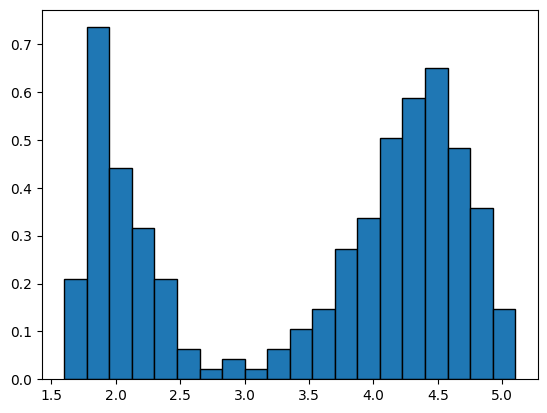

INFO:     connection closed


In [3]:
geyserApp()

In [ ]:
app_ui = ui.page_fluid(
        geyserInput("geyser"),
        geyserOutput("geyser"),
        geyserUI("geyser")
    )
def app_server(input, output, session):
    geyserServer("geyser")(input, output, session)

app = App(app_ui, app_server)

if __name__ == '__main__':
    app.run()

In [ ]:
geyserApp()

In [1]:
from plotnine import *

In [2]:
from plotnine.data import mpg

In [9]:
help(geom_histogram)

Help on class geom_histogram in module plotnine.geoms.geom_histogram:

class geom_histogram(plotnine.geoms.geom_bar.geom_bar)
 |  geom_histogram(mapping: 'aes | None' = None, data: 'DataLike | None' = None, **kwargs: 'Any')
 |
 |  Histogram
 |
 |  **Usage**
 |
 |      geom_histogram(
 |          mapping=None,
 |          data=None,
 |          *,
 |          stat="bin",
 |          position="stack",
 |          na_rm=False,
 |          inherit_aes=True,
 |          show_legend=None,
 |          raster=False,
 |          **kwargs
 |      )
 |
 |  Parameters
 |  ----------
 |  mapping : ~plotnine.mapping.aes, default=None
 |      Aesthetic mappings created with [aes](:class:`plotnine.mapping.aes`). If specified and `inherit_aes=True`{.py}, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |
 |       Aesthetic    Default value
 |      -----------  ----------------
 |      **x**
 |      **y**
 |      alpha        `1`{.py}
 |      co

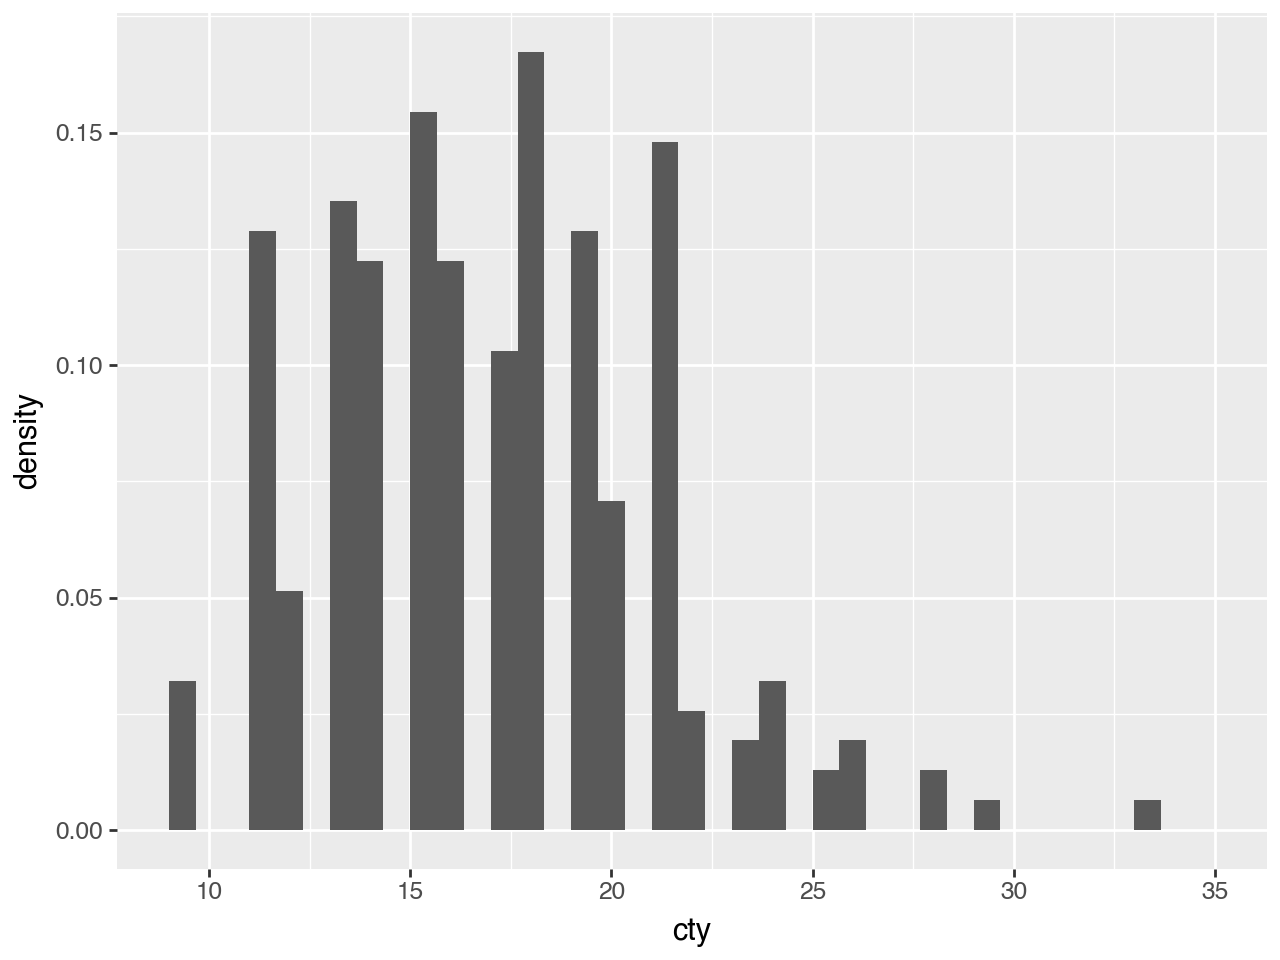

In [11]:
p = ggplot(mpg) + aes(x = "cty",
                      y = after_stat("density")) + geom_histogram(bins = 40)
p

In [29]:
import pandas as pd
from rpy2 import robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()
# Retrieve the R data frame
faithful = robjects.r['faithful']

# Use localconverter to handle the conversion
with localconverter(robjects.default_converter + pandas2ri.converter):
    faithful_df = robjects.conversion.rpy2py(faithful)

# Check the type and shape
print(type(faithful_df))
print(faithful_df.shape)

<class 'pandas.core.frame.DataFrame'>
(272, 2)


In [41]:
faithful[0].shape

(272,)

In [39]:
faithful_df.iloc[:,0].to_numpy()

array([3.6  , 1.8  , 3.333, 2.283, 4.533, 2.883, 4.7  , 3.6  , 1.95 ,
       4.35 , 1.833, 3.917, 4.2  , 1.75 , 4.7  , 2.167, 1.75 , 4.8  ,
       1.6  , 4.25 , 1.8  , 1.75 , 3.45 , 3.067, 4.533, 3.6  , 1.967,
       4.083, 3.85 , 4.433, 4.3  , 4.467, 3.367, 4.033, 3.833, 2.017,
       1.867, 4.833, 1.833, 4.783, 4.35 , 1.883, 4.567, 1.75 , 4.533,
       3.317, 3.833, 2.1  , 4.633, 2.   , 4.8  , 4.716, 1.833, 4.833,
       1.733, 4.883, 3.717, 1.667, 4.567, 4.317, 2.233, 4.5  , 1.75 ,
       4.8  , 1.817, 4.4  , 4.167, 4.7  , 2.067, 4.7  , 4.033, 1.967,
       4.5  , 4.   , 1.983, 5.067, 2.017, 4.567, 3.883, 3.6  , 4.133,
       4.333, 4.1  , 2.633, 4.067, 4.933, 3.95 , 4.517, 2.167, 4.   ,
       2.2  , 4.333, 1.867, 4.817, 1.833, 4.3  , 4.667, 3.75 , 1.867,
       4.9  , 2.483, 4.367, 2.1  , 4.5  , 4.05 , 1.867, 4.7  , 1.783,
       4.85 , 3.683, 4.733, 2.3  , 4.9  , 4.417, 1.7  , 4.633, 2.317,
       4.6  , 1.817, 4.417, 2.617, 4.067, 4.25 , 1.967, 4.6  , 3.767,
       1.917, 4.5  ,

In [27]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Extract the first row
first_row = df.iloc[0]
print(first_row)
type(df)

A    1
B    4
C    7
Name: 0, dtype: int64


pandas.core.frame.DataFrame